In [2]:
%matplotlib inline

In [3]:
import numpy as np
import urllib
import scipy.optimize
from scipy.cluster.vq import *
import random
from sklearn.decomposition import PCA
from collections import defaultdict
import matplotlib.pyplot as plt

In [4]:
def parseData(fname):
  for l in urllib.urlopen(fname):
    yield eval(l)

print "Reading data..."
data = list(parseData("http://jmcauley.ucsd.edu/cse190/data/beer/beer_50000.json"))
print "done"

Reading data...
done


In [4]:
# PCA & clustering
X = [[x['review/overall'], x['review/taste'], x['review/aroma'], x['review/appearance'], x['review/palate']] for x in data]

In [5]:
# part 1 5_d mean
overall = [x['review/overall'] for x in data]
taste = [x['review/taste'] for x in data]
aroma = [x['review/aroma'] for x in data]
appearance = [x['review/appearance'] for x in data]
palate = [x['review/palate'] for x in data]
mean = np.array([np.mean(overall),np.mean(taste), np.mean(aroma),np.mean(appearance),np.mean(palate)])
print "5 dimensional mean is ", mean

5 dimensional mean is  [ 3.88871  3.92225  3.87152  3.8984   3.85267]


In [6]:
# part 2 replace the 50,000 data points to the mean above, what is the construction error?
reconstruction_error = 0.0
for x in X:
    tmp = np.subtract(mean,x)
    result = 0.0
    # add up the squred xi
    for i in range(0,len(tmp)):
        result = result + pow(tmp[i],2)
    reconstruction_error = reconstruction_error + result
print "reconstrcution error is ", reconstruction_error

from sklearn.cluster import KMeans

# use kmean to cluster, the centroids are [[0,0,0,0,1],[0,0,0,1,0]]
centroid = np.array([[0,0,0,0,1],[0,0,0,1,0]])
kmean = KMeans(2,init = centroid)
res = kmean.fit(X)
kmeanCenter = res.cluster_centers_ 
label = res.labels_
print "After kmeans with centroid  [0,0,0,0,1],[0,0,0,1,0] is ", kmeanCenter
print "Cluster 0 has ", len(label) - sum(label), " elements"
print "Cluster 1 has ", sum(label), " elements"

reconstrcution error is  113183.433705
After kmeans with centroid  [0,0,0,0,1],[0,0,0,1,0] is  [[ 4.20261643  4.26181383  4.16148891  4.09609246  4.14522887]
 [ 3.15022797  3.12340754  3.18935229  3.43331769  3.16440928]]
Cluster 0 has  35086  elements
Cluster 1 has  14914  elements


/Users/margaretwm3/anaconda/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:731: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  n_jobs=self.n_jobs)


In [7]:
# part 4 suppose c1 = [4.17993, 4.23675, 4.14107, 4.08866, 4.12518], c2 = [3.09862, 3.06899, 3.14020, 3.38222, 3.11332]
'''
centroid = np.array([[4.17993, 4.23675, 4.14107, 4.08866, 4.12518], [3.09862, 3.06899, 3.14020, 3.38222, 3.11332]])
kmean = KMeans(2,centroid)
res = kmean.fit(X)
kmeanCenter = res.cluster_centers_ 
label = res.labels_
print "After kmeans with centroid [4.17, 4.23 ... ] center is ", kmeanCenter
'''

'\ncentroid = np.array([[4.17993, 4.23675, 4.14107, 4.08866, 4.12518], [3.09862, 3.06899, 3.14020, 3.38222, 3.11332]])\nkmean = KMeans(2,centroid)\nres = kmean.fit(X)\nkmeanCenter = res.cluster_centers_ \nlabel = res.labels_\nprint "After kmeans with centroid [4.17, 4.23 ... ] center is ", kmeanCenter\n'

In [8]:
# part 5 How many of the 50,000 points are closest to each of the two centroids c1 and c2 above
from scipy.spatial import distance
label = []
center = np.array([[4.17993, 4.23675, 4.14107, 4.08866, 4.12518], [3.09862, 3.06899, 3.14020, 3.38222, 3.11332]])
# loop through the dataset
for x in X:
    dst = distance.euclidean(x,center[0])
    dst1 = distance.euclidean(x,center[1])
    # if close to center[0]
    if dst < dst1:
        label.append(0)
    # else close to center[1], there is no point whose dst == dst1
    else:
        label.append(1)

print "Close to center 0 has ", len(label) - sum(label), " elements"
print "Close to center 1 has ", sum(label), " elements"

Close to center 0 has  36534  elements
Close to center 1 has  13466  elements


In [5]:
'''
Suppose you wanted to compress your data by replacing each point by one of the two centroids c1 and
c2 above (i.e., whichever one is nearest each point). What would be the reconstruction error in this case?
'''
reconstruction_error = 0.0
for i in range(0,len(X)):
    # if cluster to cluster 0
    if label[i] == 0:
        # calcualte the distance between center[0] and X[i]
        tmp = np.subtract(center[0],X[i])
    else:
        tmp = np.subtract(center[1],X[i])
    result = 0.0
    # add up the squred xi
    for i in range(0,len(tmp)):
        result = result + pow(tmp[i],2)
    reconstruction_error = reconstruction_error + result

print "reconstrcution error is ", reconstruction_error

NameError: name 'X' is not defined

In [83]:
''' 
K-Mean algo:
Initialize C (e.g. at random)
2. Do
3. Assign each X_i to its nearest centroid
4. Update each centroid to be the mean of points assigned to it
5. While (assignments change between iterations)
'''
from scipy.spatial import distance
centroid = np.array([[0,0,0,0,1],[0,0,0,1,0]])
c0 = np.array([0.0,0.0,0.0,0.0,1.0])
c1 = np.array([0.0,0.0,0.0,1.0,0.0])
#c0_prev = np.array([0.0,0.0,0.0,0.0,0.0])
#c1_prev = np.array([0.0,0.0,0.0,0.0,0.0])
c0_prev = []
c1_prev = []
cluster_0_counte = 0
cluster_1_counte = 0
cluster_0_sum = np.array([0.0,0.0,0.0,0.0,0.0])
cluster_1_sum = np.array([0.0,0.0,0.0,0.0,0.0])
change_0 = 1000.0
change_1 = 1000.0
threshold = 0.00001
loop = 0


while change_0 > threshold or change_1 > threshold:
#for i in range (0,20):
    c0_prev = c0
    c1_prev = c1
    cluster_0_counte = 0.0
    cluster_1_counte = 0.0
    cluster_0_sum = np.array([0.0,0.0,0.0,0.0,0.0])
    cluster_1_sum = np.array([0.0,0.0,0.0,0.0,0.0])
    loop = loop + 1
    # loop through the dataset
    for data in X:
        distance_0 = 0.0
        distance_1 = 0.0
        data_a = np.array(data)
        dst = distance.euclidean(data_a,c0)
        distance_0 = pow(dst,2)
        dst = distance.euclidean(data_a,c1)
        distance_1 = pow(dst,2)
        # close to c0
        if distance_0 < distance_1:
            # record how many points in cluster 0
            cluster_0_counte = cluster_0_counte+1
            # sum all the points in cluster 0
            cluster_0_sum = cluster_0_sum + data_a
        # close to c1
        else:
            # record how many points in cluster 1
            cluster_1_counte = cluster_1_counte + 1
            # sum all the points in cluster 0
            cluster_1_sum = cluster_1_sum + data_a
    lst0 = [0.0,0.0,0.0,0.0,0.0]
    lst1 = [0.0,0.0,0.0,0.0,0.0]
    for i in range(0,5):
        lst0[i] = cluster_0_sum[i]/cluster_0_counte
        lst1[i] = cluster_1_sum[i]/cluster_1_counte
    c0 = np.array(lst0)
    c1 = np.array(lst1)
    change_0 = distance.euclidean(c0,c0_prev)
    change_1 = distance.euclidean(c1,c1_prev)
    print "change 0 is ", change_0
    print "change 1 is ", change_1
                       
print c0
print c1
print "loop is ",loop
print "clsuter 0 sum" , cluster_0_sum
print "cluster 1 sum ", cluster_1_sum
print "cluster_0_counte ",cluster_0_counte
print "cluster_1_counte " ,cluster_1_counte

change 0 is  8.49393758473
change 1 is  8.19055225698
change 0 is  0.657403705736
change 1 is  0.616115202178
change 0 is  0.161409137463
change 1 is  0.363426245588
change 0 is  0.082774660058
change 1 is  0.161627282269
change 0 is  0.0620683247721
change 1 is  0.126465701989
change 0 is  0.0376909661243
change 1 is  0.0861521476206
change 0 is  0.0165197906871
change 1 is  0.037561480697
change 0 is  0.0182885550098
change 1 is  0.0430397056785
change 0 is  0.0074475769551
change 1 is  0.0178860447806
change 0 is  0.000851691001253
change 1 is  0.00202112593993
change 0 is  0.00101444827687
change 1 is  0.00239511367482
change 0 is  0.00495830655453
change 1 is  0.0118719738138
change 0 is  0.00194264107254
change 1 is  0.00470997459222
change 0 is  0.000135847739602
change 1 is  0.000327001356196
change 0 is  6.29556975153e-05
change 1 is  0.000151443429398
change 0 is  0.0
change 1 is  0.0
[ 4.19821338  4.25983918  4.15755422  4.0951781   4.1408347 ]
[ 3.14419016  3.11016891  3.18

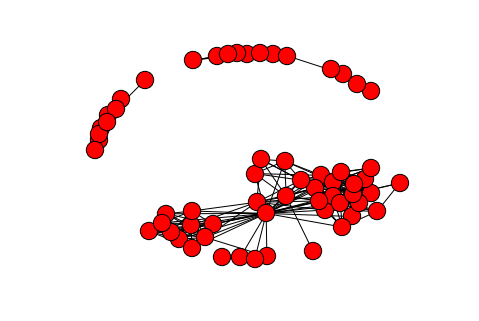

Number of edges is  270
Number of nodes is  61


In [17]:
# Task Community Detection
# How many nodes and edges are in the graph (1 mark)?
import networkx as nx

edges = set()
nodes = set()

for edge in urllib.urlopen("http://jmcauley.ucsd.edu/cse255/data/facebook/egonet.txt", 'r'):
  x,y = edge.split()
  x,y = int(x),int(y)
  edges.add((x,y))
  #edges.add((y,x))
  nodes.add(x)
  nodes.add(y)
  G = nx.Graph()
    
for e in edges:
  G.add_edge(e[0],e[1])

nx.draw(G)
plt.show()
plt.clf()

print "The graph is undirected so need to divide by 2"
print "Number of edges is ", len(edges)/2
print "Number of nodes is ", len(nodes)

In [100]:
'''
2. How many connected components are in the graph, and how many nodes are in the largest connected
component (1 mark)?
'''
print nx.number_connected_components(G)
Ccomponents = nx.connected_components(G)
component_size = [len(comp) for comp in Ccomponents]
print component_size
print "nodes in the largest connected componenet is 40" 

3
[40, 9, 12]
nodes in the largest connected componenet is 40


In [102]:
'''
Implement clique percolation and apply it to the ego-network graph. How many communities are discovered
after running clique percolation with with 4-cliques, and which nodes are their members (2 mark)?
Hint: The code from lecture 3 includes a snippet to extract all 3- and 4-cliques from the ego-network,
which may be useful.
'''
### Find all 3 and 4-cliques in the graph ###
cliques3 = set()
cliques4 = set()
for n1 in nodes:
  for n2 in nodes:
    if not ((n1,n2) in edges): continue
    for n3 in nodes:
      if not ((n1,n3) in edges): continue
      if not ((n2,n3) in edges): continue
      clique = [n1,n2,n3]
      clique.sort()
      cliques3.add(tuple(clique))
      for n4 in nodes:
        if not ((n1,n4) in edges): continue
        if not ((n2,n4) in edges): continue
        if not ((n3,n4) in edges): continue
        clique = [n1,n2,n3,n4]
        clique.sort()
        cliques4.add(tuple(clique))
        
'''
Algorithm:
1. Given a clique size K
2. Initialize every K-clique as its own community
3. While (two communities I and J have a (K-1)-clique in common):
4. Merge I and J into a single community
'''
# s1 is a tuple, s2 is the result set
def common_clique(s1,s2):
    # convert tuple to list and to set
    count = 0
    # loop through cliques4 to find all the match
    for c in s2:
        # find common elements
        count = 0
        for i in s1:
            for j in c:
                if i==j:
                    count = count + 1
        if count >=3:
            return c

community = []
# loop until the cliques set is empty
while len(cliques4)!=0:
    # already remove the element from cliques4
    current = cliques4.pop() # randomly pop one element from the set
    e = common_clique(current,cliques4)
    # if there is common clqieus between tmp and c
    if e != None:
        cliques4.remove(e)
        # merge two community together
        e_set = set(e)
        t_set = set(current)
        # or the set
        combined_set = e_set | t_set
        combined_list = list(combined_set)
        combined_tuple = tuple(combined_list)
        # add back to the cliques4 set
        cliques4.add(combined_tuple)
    # else if there is no common cliques
    else:
        # c is a tuple
        community.append(current)
print community 

[(857, 862, 865, 868), (769, 747, 772, 774, 840, 713, 719, 856, 708, 869, 800, 805, 745, 810, 811, 880, 753, 819, 823, 697, 890, 828, 830, 703), (881, 870, 871, 858, 895, 879), (867, 872, 873, 874, 877, 776, 885, 887), (856, 729, 861, 863, 804, 876, 878, 753, 882, 886, 888, 889)]


In [69]:
c = list(nx.k_clique_communities(G, 4))

In [71]:
print "correct answer", c

correct answer [frozenset([769, 747, 708, 774, 840, 713, 719, 856, 772, 805, 800, 869, 745, 810, 811, 880, 753, 819, 823, 697, 890, 828, 830, 703]), frozenset([870, 871, 879, 881, 858, 895]), frozenset([804, 876, 878, 888, 753, 882, 886, 729, 856, 889, 861, 863]), frozenset([867, 872, 873, 874, 877, 776, 885, 887]), frozenset([857, 868, 862, 865])]
